# Mengimport library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Menghubungkan colab dengan google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

# Data Wrangling

## 1. Data Gathering

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [ ]:
detail = os.listdir(path)
df_loan = pd.read_csv(path + '/' + detail[0])
df_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 2. Data Assesing

In [ ]:
print(df_loan.info())

print('\nBerikut merupakan jumlah data tiap kolom yang kosong:')
print(df_loan.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

Berikut merupakan jumlah 

In [ ]:
print("Jumlah data duplikat: ")
df_loan.duplicated().sum()

Jumlah data duplikat: 


165

In [ ]:
# Mengetahui nilai statistik tiap kolom
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


### 3. Data Cleaning

In [ ]:
# Mengisi kolom person_emp_length dan loan_int_rate dengan rata-rata
df_loan["person_emp_length"].fillna(df_loan["person_emp_length"].mean(), inplace = True)
df_loan["loan_int_rate"].fillna(df_loan["loan_int_rate"].mean(), inplace = True)

<ipython-input-200-9a62ec9e1288>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loan["person_emp_length"].fillna(df_loan["person_emp_length"].mean(), inplace = True)
<ipython-input-200-9a62ec9e1288>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
print(df_loan.isna().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
# Menghilangkan data dengan umur lebih dari atau sama dengan 100 tahun
df_loan = df_loan[df_loan["person_age"] < 100]

In [ ]:
# Menghapus data duplikat
df_loan.drop_duplicates(inplace=True)
df_loan.duplicated().sum()

<ipython-input-203-9870cd04ab0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan.drop_duplicates(inplace=True)


0

In [ ]:
print(f'Ukuran shape data: {df_loan.shape}')

Ukuran shape data: (32411, 12)


# Analisi Data Eksploratif

loan_status
0    25322
1     7089
Name: count, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

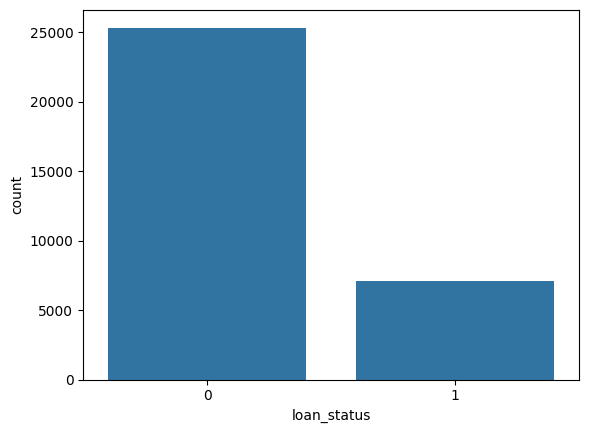

In [ ]:
# Grafik total dari loan_status
print(df_loan["loan_status"].value_counts())
sns.countplot(x="loan_status", data=df_loan)

# Preprocessing Data

In [ ]:
df_loan.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [ ]:
# Cek data kategorik
for data in df_loan.select_dtypes(include=["object"]).columns.to_list():
  print(df_loan[data].value_counts(), "\n")

person_home_ownership
RENT        16375
MORTGAGE    13367
OWN          2563
OTHER         106
Name: count, dtype: int64 

loan_intent
EDUCATION            6409
MEDICAL              6042
VENTURE              5680
PERSONAL             5497
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64 

loan_grade
A    10703
B    10384
C     6436
D     3620
E      963
F      241
G       64
Name: count, dtype: int64 

cb_person_default_on_file
N    26681
Y     5730
Name: count, dtype: int64 



In [ ]:
num_columns = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
cat_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

for category in cat_columns:
  df_loan[category] = LabelEncoder().fit_transform(df_loan[category])

In [ ]:
X_loan = df_loan.drop(columns=["loan_status"])
y_loan = df_loan["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_loan, y_loan, test_size=0.2, stratify=y_loan, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (20742, 11), y_train: (20742,)
X_val: (5186, 11), y_val: (5186,)
X_test: (6483, 11), y_test: (6483,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_batches = train_dataset.shuffle(100).batch(32)
val_batches = val_dataset.batch(128)

In [ ]:
from tensorflow.keras.regularizers import l2

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(len(X_loan.columns),)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                     │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 668,673 (2.55 MB)

 Trainable params: 668,673 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              metrics=["accuracy"])

In [ ]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 668,673 total parameters in this model.
There are 668,673 trainable parameters in this model.


In [ ]:
history = model.fit(train_batches, epochs=60, validation_data=val_batches)

Epoch 1/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7880 - loss: 3.2024 - val_accuracy: 0.8484 - val_loss: 1.6131
Epoch 2/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8536 - loss: 1.3456 - val_accuracy: 0.8556 - val_loss: 0.7872
Epoch 3/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8613 - loss: 0.6927 - val_accuracy: 0.8616 - val_loss: 0.4990
Epoch 4/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8670 - loss: 0.4675 - val_accuracy: 0.8629 - val_loss: 0.4032
Epoch 5/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8690 - loss: 0.3898 - val_accuracy: 0.8639 - val_loss: 0.3671
Epoch 6/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8734 - loss: 0.3573 - val_accuracy: 0.8658 - val_loss: 0.3491
Epoch 7/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8762 - loss: 0.3419 - val_accuracy: 0.8681 - val_loss: 0.3382
Epoch 8/60
649/649 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8781 - loss: 0.3316 - 

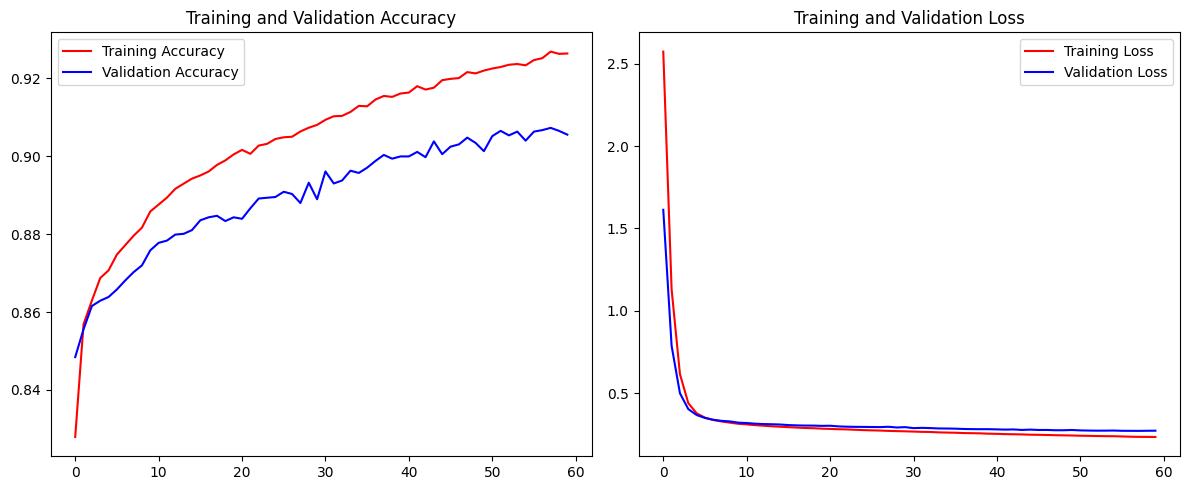

In [ ]:
# Plot grafik accuracy dan loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.figure(figsize=(12, 5))  # Atur ukuran figure (opsional)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc="best")

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc="best")

plt.tight_layout()  # Menambahkan padding antar subplot
plt.show()

In [ ]:
def preprocessing(X_data):
  dataset = scaler.transform(X_data)
  return dataset

In [ ]:
test_dataset = preprocessing(X_test)
result = X_test.copy()
result["loan_status_predict"] = model.predict(test_dataset)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
result["loan_status"] = y_test
result[["loan_status", "loan_status_predict"]].head()

,loan_status,loan_status_predict
21282,0,0.015608
26976,1,0.052970
26459,0,0.097827
24182,0,0.031629
16750,1,0.932841


In [ ]:
ini_res = result[result["loan_status"] == 1]
# ini_res[["loan_status", "loan_status_predict"]].head(50)

ini_res.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_predict,loan_status
31233,44,39000,3,2.0,3,1,12000,11.14,0.31,0,15,0.750905,1
11757,23,69000,0,0.0,4,1,2500,9.64,0.04,0,3,0.023337,1


In [ ]:
from sklearn.metrics import accuracy_score

# Mengonversi prediksi probabilitas ke kelas biner
loan_status_predict_binary = (result["loan_status_predict"] > 0.5).astype(int)

# Menghitung akurasi
accuracy = accuracy_score(result["loan_status"], loan_status_predict_binary)

print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 90.58%
